In [ ]:
'''
this is assignment 1a/1b for clim680
Rachel Gaal
'''

In [1]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
path='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/'
fname='tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012.nc'
ds=xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 1140)
Coordinates:
  * time       (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                rcp45
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SA BC MD OC Oz AA
    parent_experiment_id:         historical
    parent_experiment_rip:        r1i1p1
    branch_time:                  200

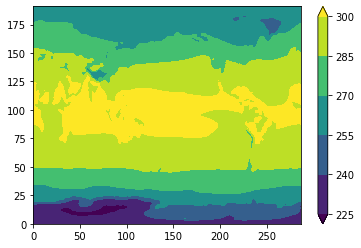

In [7]:
ds_mean=ds.mean(dim='time',dtype='float64')
plt.contourf(ds_mean['tas'],extend='both')
plt.colorbar()

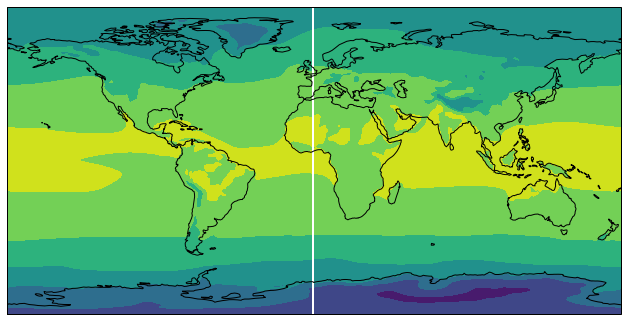

In [8]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds_mean['tas'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

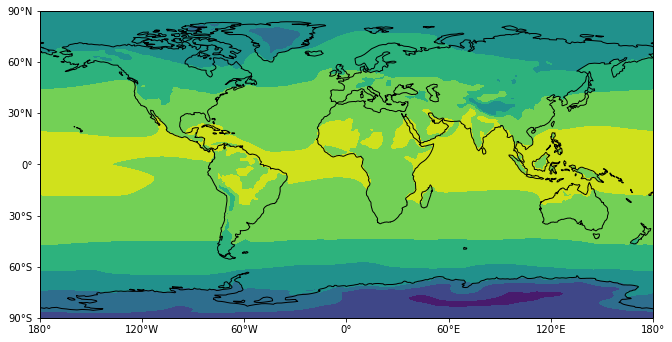

In [9]:
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

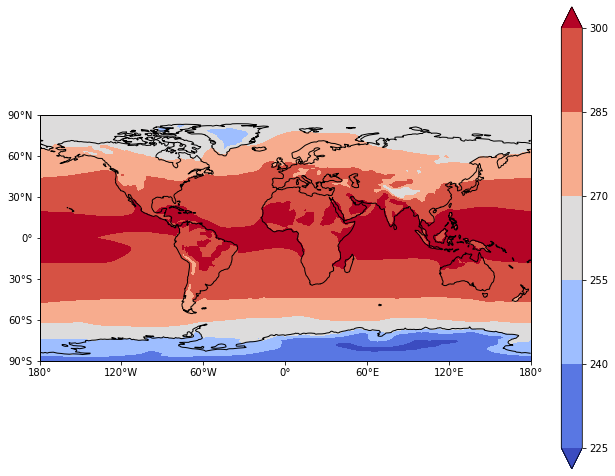

In [10]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

Text(0.5, 1.0, 'NCAR-CCSM4 RCP4.5 2100-2299')

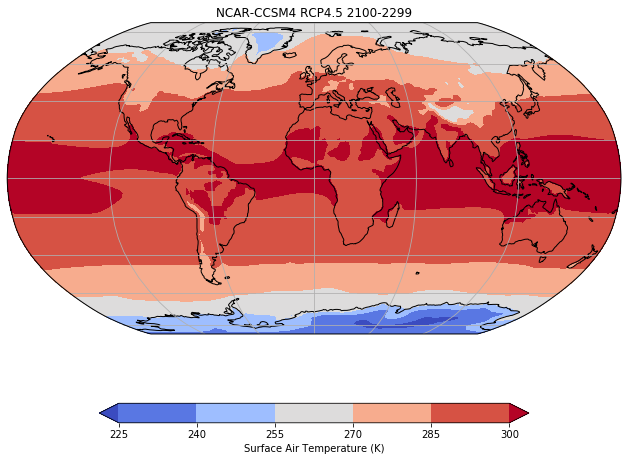

In [11]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')

# Add title
plt.title('NCAR-CCSM4 RCP4.5 2100-2299')

In [13]:
path='/homes/rgaal/clim680data/layer1/exsoil*.nc'
ds=xr.open_mfdataset(path,combine='by_coords')
ds

<xarray.Dataset>
Dimensions:  (lat: 715, lon: 1100, time: 38376)
Coordinates:
  * lat      (lat) float32 25.01516 25.051544 25.087929 ... 50.957367 50.99375
  * lon      (lon) float32 -109.9899 -109.95352 ... -70.04649 -70.01012
  * time     (time) datetime64[ns] 2004-05-01 ... 2016-08-31T23:00:00
Data variables:
    swvl1    (time, lat, lon) float32 dask.array<chunksize=(2952, 715, 1100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Feb 05 10:43:34 2020: cdo -remapcon,grid.txt newswl1.nc...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

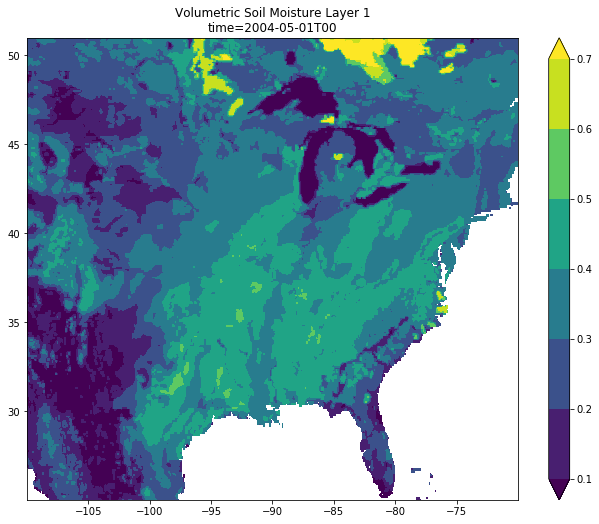

In [33]:
lat=ds['lat']
lon=ds['lon']
lons,lats=np.meshgrid(lon,lat)
plt.figure(figsize=(11,8.5))
plt.contourf(lons,lats,ds['swvl1'][0,:,:],extend='both')
mytime=np.datetime_as_string(ds['time'][0].values, unit='h')
plt.title('Volumetric Soil Moisture Layer 1\ntime='+mytime)
plt.colorbar()

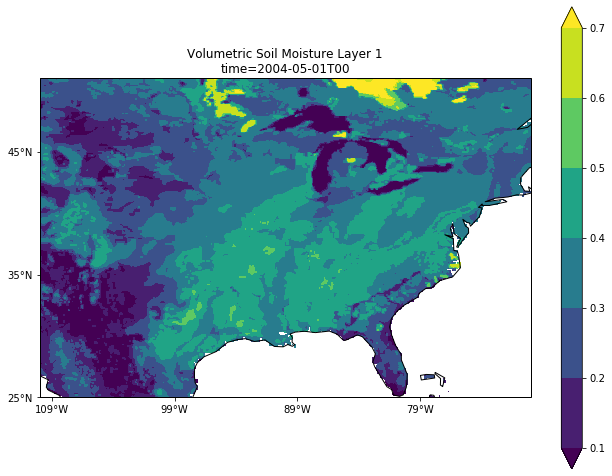

In [37]:
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
# data=ds_mean['swvl1']
# data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons,lats,ds['swvl1'][0,:,:],transform = ccrs.PlateCarree(),extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-109,-70,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,50,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.title('Volumetric Soil Moisture Layer 1\ntime='+mytime)
plt.colorbar(cs)

Text(0.5, 1.0, 'Volumetric Soil Moisture Layer 1\ntime=2004-05-01T00')

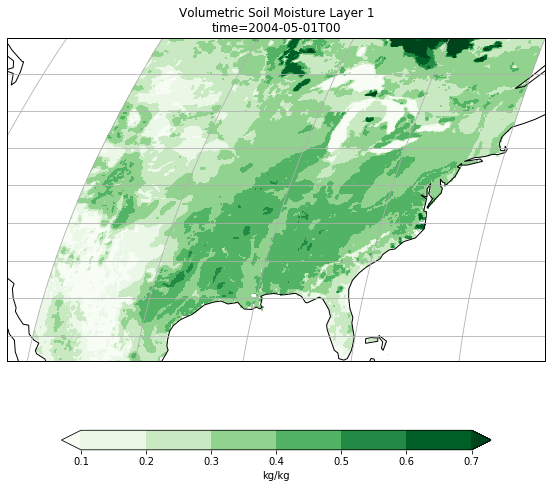

In [44]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())


# Make a filled contour plot
cs=ax.contourf(lons, lats, ds['swvl1'][0,:,:],
            transform = ccrs.PlateCarree(),cmap='Greens',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='kg/kg')

# Add title
plt.title('Volumetric Soil Moisture Layer 1\ntime='+mytime)